In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

# Introduction

In this notebook I will use Yolo V5 to do object detection on the images of the dataset. This will likely be different to the average notebook as I will be cloning the github of YoloV5 to use it and therefore working with the filesystem of Kaggle. 

I hope this serves as an introduction on how to use this powerful tool for image segmentation that is YoloV5

# Look at Some Images

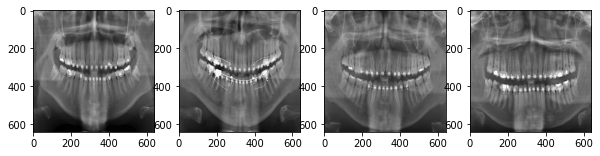

In [2]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("/kaggle/input/opg-dental/train/images/cate1-00001_jpg.rf.2f2135497bd579d2966b0cb84165ba91.jpg")
ax[0].imshow(image)
image = cv.imread("/kaggle/input/opg-dental/train/images/cate1-00010_jpg.rf.63506f6a50819aed09b55af19649671b.jpg")
ax[1].imshow(image)
image = cv.imread("/kaggle/input/opg-dental/train/images/cate1-00036_jpg.rf.3aa8cb8a60f5ace7de831d1148401214.jpg")
ax[2].imshow(image)
image = cv.imread("/kaggle/input/opg-dental/train/images/cate1-00073_jpg.rf.415e3ce5ef6490c4d1e1f001048734b4.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [3]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


# Download YoloV5

In [4]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16623, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 16623 (delta 56), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16623/16623), 15.15 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (11409/11409), done.
/kaggle/tmp/yolov5
ERROR: Ignored the following versions that require a different python version: 1.22.0 Requires-Python >=3.8; 1.22.1 Requires-Python >=3.8; 1.22.2 Requires-Python >=3.8; 1.22.3 Requires-Python >=3.8; 1.22.4 Requires-Python >=3.8; 1.23.0 Requires-Python >=3.8; 1.23.0rc1 Requires-Python >=3.8; 1.23.0rc2 Requires-Python >=3.8; 1.23.0rc3 Requires-Python >=3.8; 1.23.1 Requires-Python >=3.8; 1.23.2 Requires-Python >=3.8; 1.23.3 Requires-Python >=3.8; 1.23.4 Requires-Python >=3.8; 1.23.5 Requires-Python >=3.8; 1.24.0 Requires-Python >=3.8; 1.24.0rc1 Requires-Python >=3.8; 1.24.0rc2 Requires-Python >=3.8; 1.24.1 Requires-Python >=3.

# New YAML file

Create new Yaml file to fit the file system. 

In [5]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '../../input/opg-dental/train',
    val = '../../input/opg-dental/valid',
    nc = 10,
    names = ['Am', 'Co', 'Cr', 'De', 'Im', 'Ov', 'Re', 'Ro', 'pe', 'po']
    #names = ['AmalgamRestoration', 'CompositeResinRestoration', 'Crown', 'DentalCaries', 'ImpactedTooth', 'Overhang', 'RetainedRoots', 'RootCanalTreatment', 'periapicalLesion', 'post']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [6]:
%cd yolov5

/kaggle/tmp/yolov5


# Train the Yolov5 Model

In [7]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5n.pt

W&B disabled.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 13.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 19.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultral

# Model Validation Output

Let's look at how the model performed on a validation batch

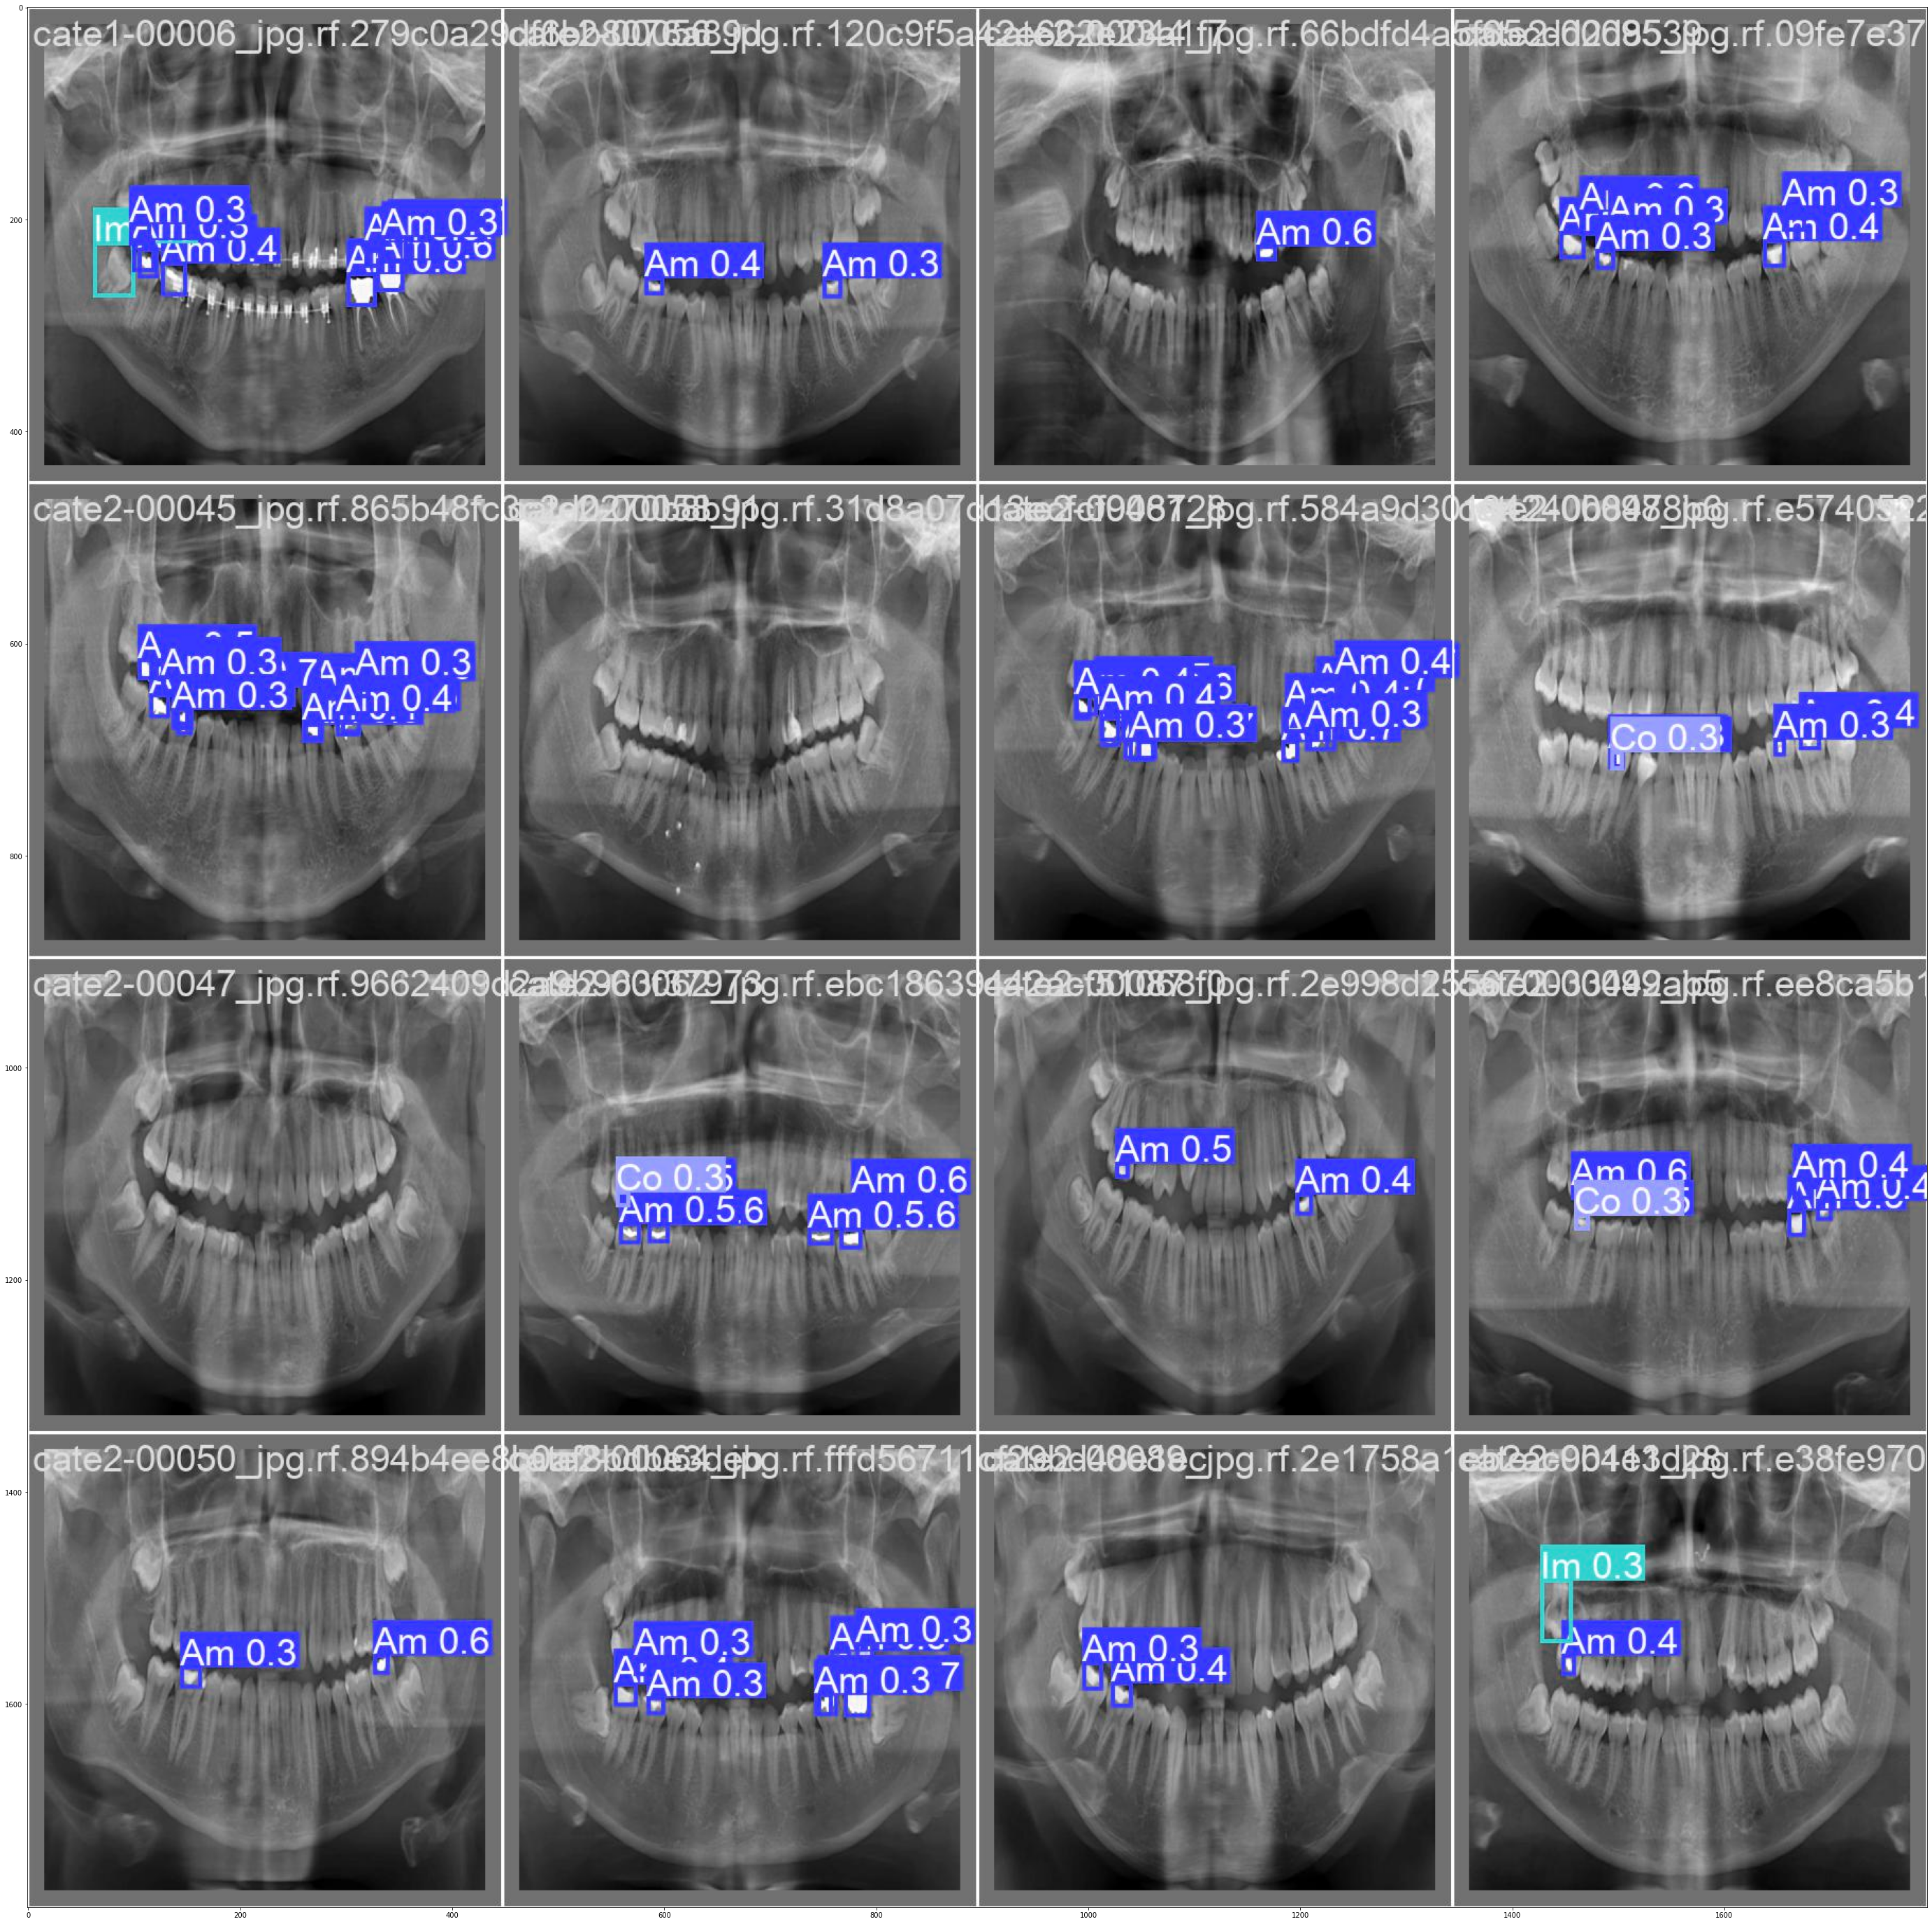

In [8]:
img = cv.imread("runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(50, 50))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [9]:

!python detect.py --source ../../input/opg-dental/test/images/cate1-00047_jpg.rf.9502fe732690c6d2a19c6fbde83654b4.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=../../input/opg-dental/test/images/cate1-00047_jpg.rf.9502fe732690c6d2a19c6fbde83654b4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
ERROR: Ignored the following versions that require a different python version: 10.0.0 Requires-Python >=3.8; 10.0.1 Requires-Python >=3.8; 10.1.0 Requires-Python >=3.8; 10.2.0 Requires-Python >=3.8; 10.3.0 Requires-Python >=3.8
ERROR: Could not find a version that satisfies the requirement pillow>=10.3.0 (from versions: 1

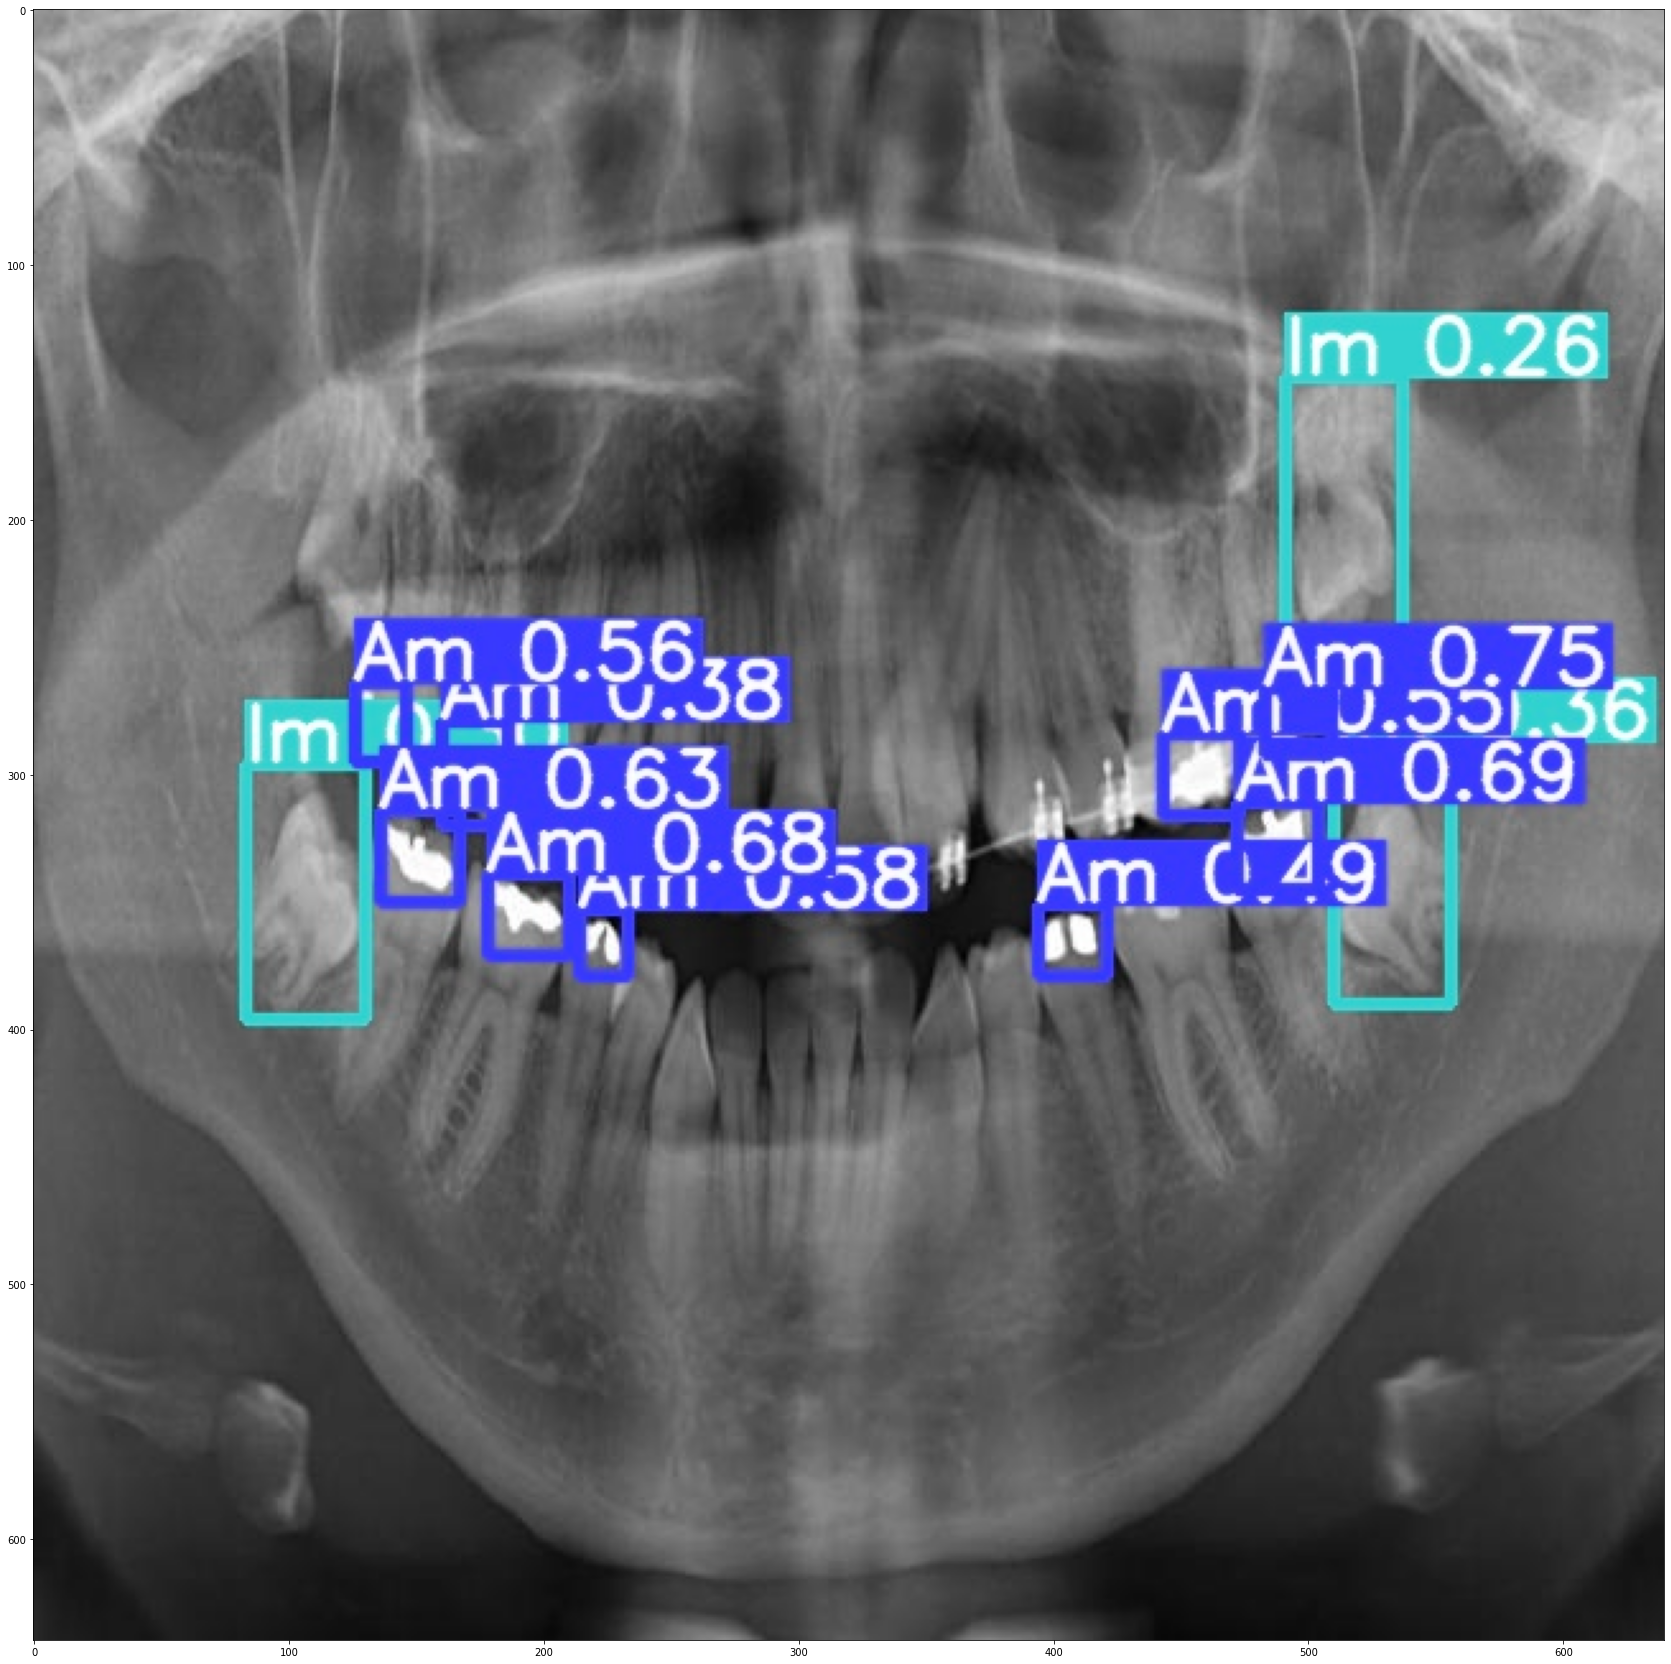

In [10]:

img = cv.imread("runs/detect/exp/cate1-00047_jpg.rf.9502fe732690c6d2a19c6fbde83654b4.jpg")
plt.figure(figsize=(30, 30))
plt.imshow(img)


In [11]:
#cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg
!python detect.py --source ../../input/opg-dental/test/images/cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=../../input/opg-dental/test/images/cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
ERROR: Ignored the following versions that require a different python version: 10.0.0 Requires-Python >=3.8; 10.0.1 Requires-Python >=3.8; 10.1.0 Requires-Python >=3.8; 10.2.0 Requires-Python >=3.8; 10.3.0 Requires-Python >=3.8
ERROR: Could not find a version that satisfies the requirement pillow>=10.3.0 (from versions: 1

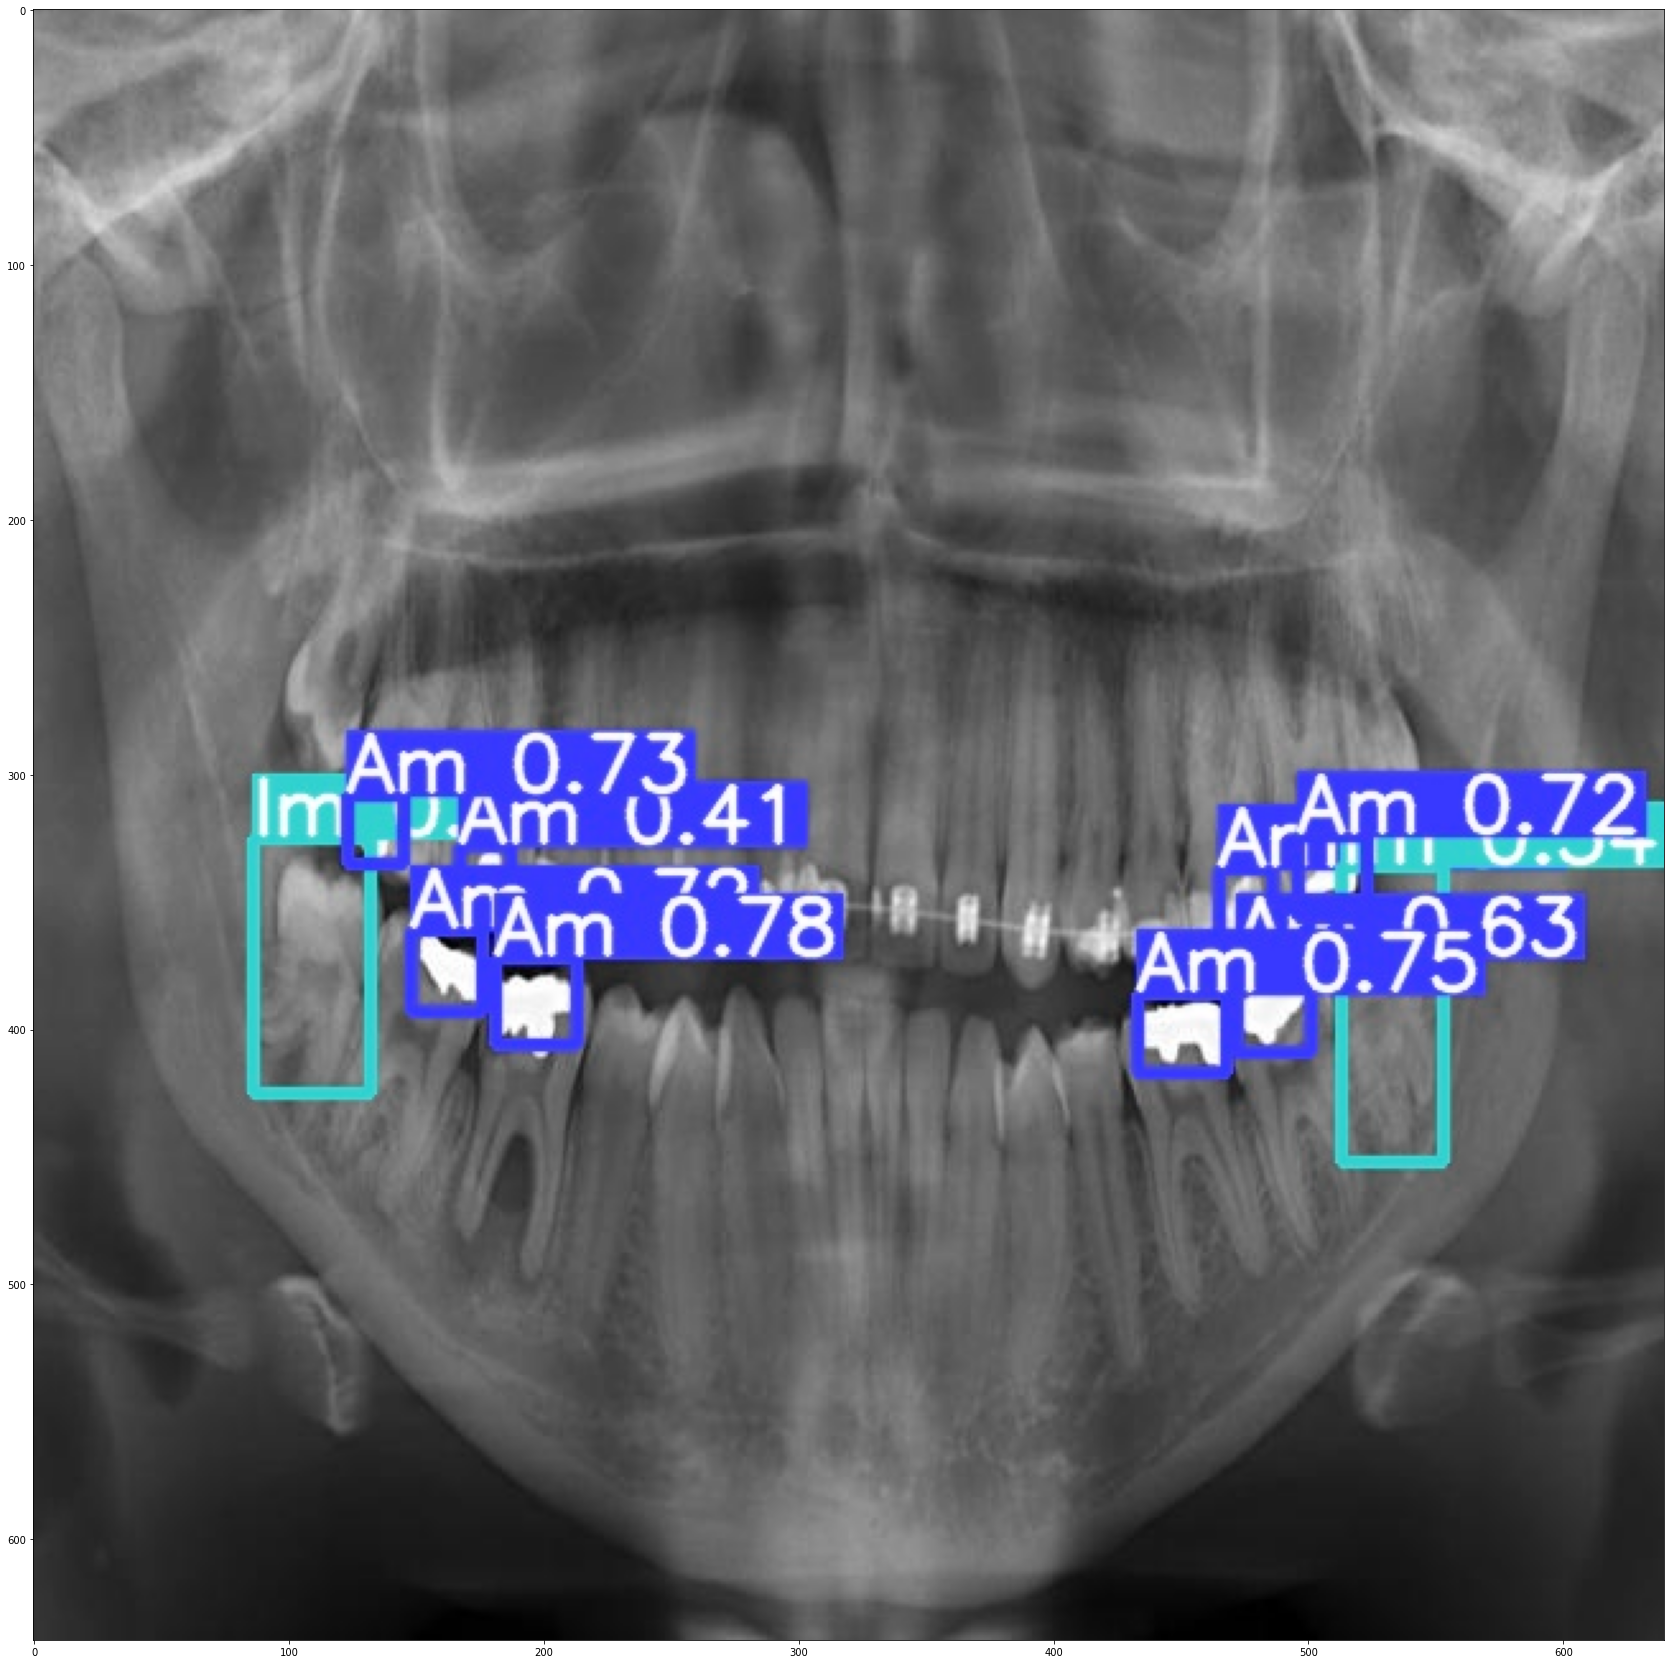

In [12]:

img = cv.imread("runs/detect/exp2/cate1-00032_jpg.rf.c62725cfa68f4848c5bf1e2ca435d9b9.jpg")
plt.figure(figsize=(30, 30))
plt.imshow(img)

# Conclusion

This shows YoloV5 being effective with this dataset. I am keen to see what you can do with the dataset :).